# Stage Boundary Visualization

In [1]:
import pandas as pd
import utils.constants as c
import utils.harry_plotter as harry_plotter

from utils import io

In [ ]:
ORBIT_ID = 4052

Retrieve labels

In [2]:
df_labels = pd.read_csv(io.resolve_path(c.DATA_DIR) / c.LABEL_FILE,
                        index_col=c.ORBIT_COL, parse_dates=c.EVENT_COLS)

Load the specified orbit


In [4]:
df_orbit = pd.read_csv(io.resolve_path(c.DATA_DIR) / c.TRAIN_SUBDIR / c.ORBIT_FILE(ORBIT_ID),
                       index_col=c.DATE_COL, parse_dates=True)

Show stage boundary timestamps

In [5]:
df_labels.loc[ORBIT_ID]

SK outer in    2015-04-15 19:09:05
SK inner in    2015-04-15 19:24:37
MP outer in    2015-04-15 19:54:50
MP inner in    2015-04-15 19:59:58
MP inner out   2015-04-15 20:47:41
MP outer out   2015-04-15 20:56:19
SK inner out   2015-04-15 21:07:00
SK outer out   2015-04-15 21:15:38
Name: 4052, dtype: datetime64[ns]

Plot magnetic flux density with stages

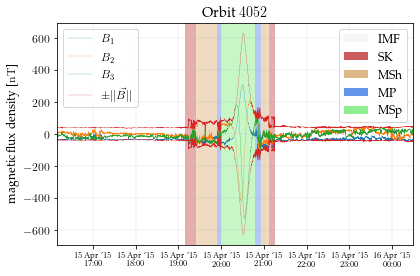

In [6]:
figpath = str(io.resolve_path(c.TEMP_DIR) / c.MESSENGER(ORBIT_ID)) + "_stages.pdf"
harry_plotter.plot_orbit(
    df_orbit.index,
    (df_orbit["BX_MSO"],
    df_orbit["BY_MSO"],
    df_orbit["BZ_MSO"]),
    symbol="B",
    labels=df_orbit[c.LABEL_COL],
    title=f"Orbit $\#{ORBIT_ID}$",
    ylabel="magnetic flux density [\si{nT}]",
    outfile=figpath
)